In [1]:
import pandas as pd 
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
multi_act = pd.read_csv("ATUS DATA 03-19/atus_activity_0319.dat", 
                        dtype= {"TRCODEP": object, "TRTIER1P": object, "TRTIER2P": object}) #using 2003-2019 activity file
#multi_act

In [3]:
multi_resp = pd.read_csv("ATUS DATA 03-19/atus_resp_0319.dat")
#multi_resp

In [4]:
multi_merged = pd.merge(multi_act, multi_resp, on="TUCASEID")
multi_merged = multi_merged.filter(["TUCASEID","TUACTDUR24","TUCUMDUR","TRTIER1P","TRTIER2P","TRCODEP", 
                                    "TEWHERE","TELFS", "TUFNWGTP","TUSTARTTIM","TUSTOPTIME", "TUYEAR"])
#multi_merged

In [5]:
#TELFS = employment status 
multi_merged["TELFS"].unique()

array([2, 1, 4, 5, 3])

## Employed Population

In [6]:
Employed_codes = [1,2] # 3= Employed - on layoff, 3 = Employed - looking
multi_merged_Employed = multi_merged[multi_merged["TELFS"].isin(Employed_codes)]
multi_merged_Employed["TELFS"].unique()

array([2, 1])

In [7]:
emp_2003 = multi_merged_Employed[multi_merged_Employed["TUCASEID"].apply(str).str.startswith("2003")]
atus_2003_emp_weight = emp_2003.drop_duplicates(subset=["TUCASEID"])
atus_2003_emp_weight = atus_2003_emp_weight["TUFNWGTP"].sum()
atus_2003_emp_weight

53187186872.01529

## 2003-2019 Residential - Employed

In [8]:
#only residential location from 2003-2019
residential_location = [-1,1,3]
atus_multi_yr_res_emp = multi_merged_Employed[multi_merged_Employed["TEWHERE"].isin(residential_location)]
#atus_multi_yr_res_emp

In [9]:
#atus residential year seperation by Employed population 
atus_2003_res_emp = atus_multi_yr_res_emp[atus_multi_yr_res_emp["TUCASEID"].apply(str).str.startswith("2003")]
atus_2004_res_emp = atus_multi_yr_res_emp[atus_multi_yr_res_emp["TUCASEID"].apply(str).str.startswith("2004")]
atus_2005_res_emp = atus_multi_yr_res_emp[atus_multi_yr_res_emp["TUCASEID"].apply(str).str.startswith("2005")]
atus_2006_res_emp = atus_multi_yr_res_emp[atus_multi_yr_res_emp["TUCASEID"].apply(str).str.startswith("2006")]
atus_2007_res_emp = atus_multi_yr_res_emp[atus_multi_yr_res_emp["TUCASEID"].apply(str).str.startswith("2007")]
atus_2008_res_emp = atus_multi_yr_res_emp[atus_multi_yr_res_emp["TUCASEID"].apply(str).str.startswith("2008")]
atus_2009_res_emp = atus_multi_yr_res_emp[atus_multi_yr_res_emp["TUCASEID"].apply(str).str.startswith("2009")]
atus_2010_res_emp = atus_multi_yr_res_emp[atus_multi_yr_res_emp["TUCASEID"].apply(str).str.startswith("2010")]
atus_2011_res_emp = atus_multi_yr_res_emp[atus_multi_yr_res_emp["TUCASEID"].apply(str).str.startswith("2011")]
atus_2012_res_emp = atus_multi_yr_res_emp[atus_multi_yr_res_emp["TUCASEID"].apply(str).str.startswith("2012")]
atus_2013_res_emp = atus_multi_yr_res_emp[atus_multi_yr_res_emp["TUCASEID"].apply(str).str.startswith("2013")]
atus_2014_res_emp = atus_multi_yr_res_emp[atus_multi_yr_res_emp["TUCASEID"].apply(str).str.startswith("2014")]
atus_2015_res_emp = atus_multi_yr_res_emp[atus_multi_yr_res_emp["TUCASEID"].apply(str).str.startswith("2015")]
atus_2016_res_emp = atus_multi_yr_res_emp[atus_multi_yr_res_emp["TUCASEID"].apply(str).str.startswith("2016")]
atus_2017_res_emp = atus_multi_yr_res_emp[atus_multi_yr_res_emp["TUCASEID"].apply(str).str.startswith("2017")]
atus_2018_res_emp = atus_multi_yr_res_emp[atus_multi_yr_res_emp["TUCASEID"].apply(str).str.startswith("2018")]
atus_2019_res_emp = atus_multi_yr_res_emp[atus_multi_yr_res_emp["TUCASEID"].apply(str).str.startswith("2019")]
#atus_2003_res_emp

### 2003 All Residential Activities - Employed Population

In [10]:
atus_2003_all_res_emp = atus_2003_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2003_all_res_emp

In [11]:
atus_2003_all_res_emp_merge = pd.merge(atus_2003_all_res_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2003_all_res_emp_merge

In [12]:
atus_2003_all_res_emp_merge["Multiplied Weight"] = atus_2003_all_res_emp_merge["TUACTDUR24"] * atus_2003_all_res_emp_merge["TUFNWGTP"]
#atus_2003_all_res_emp_merge

In [13]:
atus_2003_all_res_emp_multiplied_weight = atus_2003_all_res_emp_merge["Multiplied Weight"].sum()
atus_2003_all_res_emp_multiplied_weight

49942198160284.39

In [14]:
emp_2003 = multi_merged_Employed[multi_merged_Employed["TUCASEID"].apply(str).str.startswith("2003")]
atus_2003_emp_weight = emp_2003.drop_duplicates(subset=["TUCASEID"])
atus_2003_emp_weight = atus_2003_emp_weight["TUFNWGTP"].sum()
atus_2003_emp_weight

53187186872.01529

In [15]:
all_act_2003_res_emp_hpd = atus_2003_all_res_emp_multiplied_weight / atus_2003_emp_weight / 60
all_act_2003_res_emp_hpd

15.649821287615964

### 2004 All Residential Activities - Employed Population

In [16]:
atus_2004_all_res_emp = atus_2004_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2004_all_res_emp

In [17]:
atus_2004_all_res_emp_merge = pd.merge(atus_2004_all_res_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2004_all_res_emp_merge["Multiplied Weight"] = atus_2004_all_res_emp_merge["TUACTDUR24"] * atus_2004_all_res_emp_merge["TUFNWGTP"]
#atus_2004_all_res_emp_merge

In [18]:
emp_2004 = multi_merged_Employed[multi_merged_Employed["TUCASEID"].apply(str).str.startswith("2004")]
atus_2004_emp_weight = emp_2004.drop_duplicates(subset=["TUCASEID"])
atus_2004_emp_weight = atus_2004_emp_weight["TUFNWGTP"].sum()

atus_2004_all_res_emp_multiplied_weight = atus_2004_all_res_emp_merge["Multiplied Weight"].sum()

In [19]:
all_act_2004_res_emp_hpd = atus_2004_all_res_emp_multiplied_weight / atus_2004_emp_weight / 60
all_act_2004_res_emp_hpd

15.641641276921264

### 2005 All Residential Activities - Employed Population

In [20]:
atus_2005_all_res_emp = atus_2005_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2005_all_res_emp

In [21]:
atus_2005_all_res_emp_merge = pd.merge(atus_2005_all_res_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2005_all_res_emp_merge["Multiplied Weight"] = atus_2005_all_res_emp_merge["TUACTDUR24"] * atus_2005_all_res_emp_merge["TUFNWGTP"]
#atus_2005_all_res_emp_merge

In [22]:
emp_2005 = multi_merged_Employed[multi_merged_Employed["TUCASEID"].apply(str).str.startswith("2005")]
atus_2005_emp_weight = emp_2005.drop_duplicates(subset=["TUCASEID"])
atus_2005_emp_weight = atus_2005_emp_weight["TUFNWGTP"].sum()

atus_2005_all_res_emp_multiplied_weight = atus_2005_all_res_emp_merge["Multiplied Weight"].sum()

In [23]:
all_act_2005_res_emp_hpd = atus_2005_all_res_emp_multiplied_weight / atus_2005_emp_weight / 60
all_act_2005_res_emp_hpd

15.762196371062803

### 2006 All Residential Activities - Employed Population

In [24]:
atus_2006_all_res_emp = atus_2006_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2006_all_res_emp

In [25]:
atus_2006_all_res_emp_merge = pd.merge(atus_2006_all_res_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2006_all_res_emp_merge["Multiplied Weight"] = atus_2006_all_res_emp_merge["TUACTDUR24"] * atus_2006_all_res_emp_merge["TUFNWGTP"]
#atus_2006_all_res_emp_merge

In [26]:
emp_2006 = multi_merged_Employed[multi_merged_Employed["TUCASEID"].apply(str).str.startswith("2006")]
atus_2006_emp_weight = emp_2006.drop_duplicates(subset=["TUCASEID"])
atus_2006_emp_weight = atus_2006_emp_weight["TUFNWGTP"].sum()

atus_2006_all_res_emp_multiplied_weight = atus_2006_all_res_emp_merge["Multiplied Weight"].sum()

In [27]:
all_act_2006_res_emp_hpd = atus_2006_all_res_emp_multiplied_weight / atus_2006_emp_weight / 60
all_act_2006_res_emp_hpd

15.587197063325505

### 2007 All Residential Activities - Employed Population

In [28]:
atus_2007_all_res_emp = atus_2007_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2007_all_res_emp

In [29]:
atus_2007_all_res_emp_merge = pd.merge(atus_2007_all_res_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2007_all_res_emp_merge["Multiplied Weight"] = atus_2007_all_res_emp_merge["TUACTDUR24"] * atus_2007_all_res_emp_merge["TUFNWGTP"]
#atus_2007_all_res_emp_merge

In [30]:
emp_2007 = multi_merged_Employed[multi_merged_Employed["TUCASEID"].apply(str).str.startswith("2007")]
atus_2007_emp_weight = emp_2007.drop_duplicates(subset=["TUCASEID"])
atus_2007_emp_weight = atus_2007_emp_weight["TUFNWGTP"].sum()

atus_2007_all_res_emp_multiplied_weight = atus_2007_all_res_emp_merge["Multiplied Weight"].sum()

In [31]:
all_act_2007_res_emp_hpd = atus_2007_all_res_emp_multiplied_weight / atus_2007_emp_weight / 60
all_act_2007_res_emp_hpd

15.673922525003073

### 2008 All Residential Activities - Employed Population

In [32]:
atus_2008_all_res_emp = atus_2008_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2008_all_res_emp

In [33]:
atus_2008_all_res_emp_merge = pd.merge(atus_2008_all_res_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2008_all_res_emp_merge["Multiplied Weight"] = atus_2008_all_res_emp_merge["TUACTDUR24"] * atus_2008_all_res_emp_merge["TUFNWGTP"]
#atus_2008_all_res_emp_merge

In [34]:
emp_2008 = multi_merged_Employed[multi_merged_Employed["TUCASEID"].apply(str).str.startswith("2008")]
atus_2008_emp_weight = emp_2008.drop_duplicates(subset=["TUCASEID"])
atus_2008_emp_weight = atus_2008_emp_weight["TUFNWGTP"].sum()

atus_2008_all_res_emp_multiplied_weight = atus_2008_all_res_emp_merge["Multiplied Weight"].sum()

In [35]:
all_act_2008_res_emp_hpd = atus_2008_all_res_emp_multiplied_weight / atus_2008_emp_weight / 60
all_act_2008_res_emp_hpd

15.851603139249415

### 2009 All Residential Activities - Employed Population

In [36]:
atus_2009_all_res_emp = atus_2009_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2009_all_res_emp

In [37]:
atus_2009_all_res_emp_merge = pd.merge(atus_2009_all_res_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2009_all_res_emp_merge["Multiplied Weight"] = atus_2009_all_res_emp_merge["TUACTDUR24"] * atus_2009_all_res_emp_merge["TUFNWGTP"]
#atus_2009_all_res_emp_merge

In [38]:
emp_2009 = multi_merged_Employed[multi_merged_Employed["TUCASEID"].apply(str).str.startswith("2009")]
atus_2009_emp_weight = emp_2009.drop_duplicates(subset=["TUCASEID"])
atus_2009_emp_weight = atus_2009_emp_weight["TUFNWGTP"].sum()

atus_2009_all_res_emp_multiplied_weight = atus_2009_all_res_emp_merge["Multiplied Weight"].sum()

In [39]:
all_act_2009_res_emp_hpd = atus_2009_all_res_emp_multiplied_weight / atus_2009_emp_weight / 60
all_act_2009_res_emp_hpd

15.97076000084869

### 2010 All Residential Activities - Employed Population

In [40]:
atus_2010_all_res_emp = atus_2010_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2010_all_res_emp

In [41]:
atus_2010_all_res_emp_merge = pd.merge(atus_2010_all_res_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2010_all_res_emp_merge["Multiplied Weight"] = atus_2010_all_res_emp_merge["TUACTDUR24"] * atus_2010_all_res_emp_merge["TUFNWGTP"]
#atus_2010_all_res_emp_merge

In [42]:
emp_2010 = multi_merged_Employed[multi_merged_Employed["TUCASEID"].apply(str).str.startswith("2010")]
atus_2010_emp_weight = emp_2010.drop_duplicates(subset=["TUCASEID"])
atus_2010_emp_weight = atus_2010_emp_weight["TUFNWGTP"].sum()

atus_2010_all_res_emp_multiplied_weight = atus_2010_all_res_emp_merge["Multiplied Weight"].sum()

In [43]:
all_act_2010_res_emp_hpd = atus_2010_all_res_emp_multiplied_weight / atus_2010_emp_weight / 60
all_act_2010_res_emp_hpd

15.895993031159824

### 2011 All Residential Activities - Employed Population

In [44]:
atus_2011_all_res_emp = atus_2011_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2011_all_res_emp

In [45]:
atus_2011_all_res_emp_merge = pd.merge(atus_2011_all_res_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2011_all_res_emp_merge["Multiplied Weight"] = atus_2011_all_res_emp_merge["TUACTDUR24"] * atus_2011_all_res_emp_merge["TUFNWGTP"]
#atus_2011_all_res_emp_merge

In [46]:
atus_2011_all_res_emp_merge = pd.merge(atus_2011_all_res_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2011_all_res_emp_merge["Multiplied Weight"] = atus_2011_all_res_emp_merge["TUACTDUR24"] * atus_2011_all_res_emp_merge["TUFNWGTP"]
#atus_2011_all_res_emp_merge

In [47]:
emp_2011 = multi_merged_Employed[multi_merged_Employed["TUCASEID"].apply(str).str.startswith("2011")]
atus_2011_emp_weight = emp_2011.drop_duplicates(subset=["TUCASEID"])
atus_2011_emp_weight = atus_2011_emp_weight["TUFNWGTP"].sum()

atus_2011_all_res_emp_multiplied_weight = atus_2011_all_res_emp_merge["Multiplied Weight"].sum()

In [48]:
all_act_2011_res_emp_hpd = atus_2011_all_res_emp_multiplied_weight / atus_2011_emp_weight / 60
all_act_2011_res_emp_hpd

15.861696126623604

### 2012 All Residential Activities - Employed Population

In [49]:
atus_2012_all_res_emp = atus_2012_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2012_all_res_emp

In [50]:
atus_2012_all_res_emp_merge = pd.merge(atus_2012_all_res_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2012_all_res_emp_merge["Multiplied Weight"] = atus_2012_all_res_emp_merge["TUACTDUR24"] * atus_2012_all_res_emp_merge["TUFNWGTP"]
#atus_2012_all_res_emp_merge

In [51]:
atus_2012_all_res_emp_merge = pd.merge(atus_2012_all_res_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2012_all_res_emp_merge["Multiplied Weight"] = atus_2012_all_res_emp_merge["TUACTDUR24"] * atus_2012_all_res_emp_merge["TUFNWGTP"]
#atus_2012_all_res_emp_merge

In [52]:
emp_2012 = multi_merged_Employed[multi_merged_Employed["TUCASEID"].apply(str).str.startswith("2012")]
atus_2012_emp_weight = emp_2012.drop_duplicates(subset=["TUCASEID"])
atus_2012_emp_weight = atus_2012_emp_weight["TUFNWGTP"].sum()

atus_2012_all_res_emp_multiplied_weight = atus_2012_all_res_emp_merge["Multiplied Weight"].sum()

In [53]:
all_act_2012_res_emp_hpd = atus_2012_all_res_emp_multiplied_weight / atus_2012_emp_weight / 60
all_act_2012_res_emp_hpd

15.973406878937983

### 2013 All Residential Activities - Employed Population

In [54]:
atus_2013_all_res_emp = atus_2013_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2013_all_res_emp

In [55]:
atus_2013_all_res_emp_merge = pd.merge(atus_2013_all_res_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2013_all_res_emp_merge["Multiplied Weight"] = atus_2013_all_res_emp_merge["TUACTDUR24"] * atus_2013_all_res_emp_merge["TUFNWGTP"]
#atus_2013_all_res_emp_merge

In [56]:
atus_2013_all_res_emp_merge = pd.merge(atus_2013_all_res_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2013_all_res_emp_merge["Multiplied Weight"] = atus_2013_all_res_emp_merge["TUACTDUR24"] * atus_2013_all_res_emp_merge["TUFNWGTP"]
#atus_2013_all_res_emp_merge

In [57]:
emp_2013 = multi_merged_Employed[multi_merged_Employed["TUCASEID"].apply(str).str.startswith("2013")]
atus_2013_emp_weight = emp_2013.drop_duplicates(subset=["TUCASEID"])
atus_2013_emp_weight = atus_2013_emp_weight["TUFNWGTP"].sum()

atus_2013_all_res_emp_multiplied_weight = atus_2013_all_res_emp_merge["Multiplied Weight"].sum()

In [58]:
all_act_2013_res_emp_hpd = atus_2013_all_res_emp_multiplied_weight / atus_2013_emp_weight / 60
all_act_2013_res_emp_hpd

15.98869640390716

### 2014 All Residential Activities - Employed Population

In [59]:
atus_2014_all_res_emp = atus_2014_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2014_all_res_emp

In [60]:
atus_2014_all_res_emp_merge = pd.merge(atus_2014_all_res_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2014_all_res_emp_merge["Multiplied Weight"] = atus_2014_all_res_emp_merge["TUACTDUR24"] * atus_2014_all_res_emp_merge["TUFNWGTP"]
#atus_2014_all_res_emp_merge

In [61]:
atus_2014_all_res_emp_merge = pd.merge(atus_2014_all_res_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2014_all_res_emp_merge["Multiplied Weight"] = atus_2014_all_res_emp_merge["TUACTDUR24"] * atus_2014_all_res_emp_merge["TUFNWGTP"]
#atus_2014_all_res_emp_merge

In [62]:
emp_2014 = multi_merged_Employed[multi_merged_Employed["TUCASEID"].apply(str).str.startswith("2014")]
atus_2014_emp_weight = emp_2014.drop_duplicates(subset=["TUCASEID"])
atus_2014_emp_weight = atus_2014_emp_weight["TUFNWGTP"].sum()

atus_2014_all_res_emp_multiplied_weight = atus_2014_all_res_emp_merge["Multiplied Weight"].sum()

In [63]:
all_act_2014_res_emp_hpd = atus_2014_all_res_emp_multiplied_weight / atus_2014_emp_weight / 60
all_act_2014_res_emp_hpd

15.932269442477272

### 2015 All Residential Activities - Employed Population

In [64]:
atus_2015_all_res_emp = atus_2015_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2015_all_res_emp

In [65]:
atus_2015_all_res_emp_merge = pd.merge(atus_2015_all_res_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2015_all_res_emp_merge["Multiplied Weight"] = atus_2015_all_res_emp_merge["TUACTDUR24"] * atus_2015_all_res_emp_merge["TUFNWGTP"]
#atus_2015_all_res_emp_merge

In [66]:
atus_2015_all_res_emp_merge = pd.merge(atus_2015_all_res_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2015_all_res_emp_merge["Multiplied Weight"] = atus_2015_all_res_emp_merge["TUACTDUR24"] * atus_2015_all_res_emp_merge["TUFNWGTP"]
#atus_2015_all_res_emp_merge

In [67]:
emp_2015 = multi_merged_Employed[multi_merged_Employed["TUCASEID"].apply(str).str.startswith("2015")]
atus_2015_emp_weight = emp_2015.drop_duplicates(subset=["TUCASEID"])
atus_2015_emp_weight = atus_2015_emp_weight["TUFNWGTP"].sum()

atus_2015_all_res_emp_multiplied_weight = atus_2015_all_res_emp_merge["Multiplied Weight"].sum()

In [68]:
all_act_2015_res_emp_hpd = atus_2015_all_res_emp_multiplied_weight / atus_2015_emp_weight / 60
all_act_2015_res_emp_hpd

16.045970747702995

### 2016 All Residential Activities - Employed Population

In [69]:
atus_2016_all_res_emp = atus_2016_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2016_all_res_emp

In [70]:
atus_2016_all_res_emp_merge = pd.merge(atus_2016_all_res_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2016_all_res_emp_merge["Multiplied Weight"] = atus_2016_all_res_emp_merge["TUACTDUR24"] * atus_2016_all_res_emp_merge["TUFNWGTP"]
#atus_2016_all_res_emp_merge

In [71]:
atus_2016_all_res_emp_merge = pd.merge(atus_2016_all_res_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2016_all_res_emp_merge["Multiplied Weight"] = atus_2016_all_res_emp_merge["TUACTDUR24"] * atus_2016_all_res_emp_merge["TUFNWGTP"]
#atus_2016_all_res_emp_merge

In [72]:
emp_2016 = multi_merged_Employed[multi_merged_Employed["TUCASEID"].apply(str).str.startswith("2016")]
atus_2016_emp_weight = emp_2016.drop_duplicates(subset=["TUCASEID"])
atus_2016_emp_weight = atus_2016_emp_weight["TUFNWGTP"].sum()

atus_2016_all_res_emp_multiplied_weight = atus_2016_all_res_emp_merge["Multiplied Weight"].sum()

In [73]:
all_act_2016_res_emp_hpd = atus_2016_all_res_emp_multiplied_weight / atus_2016_emp_weight / 60
all_act_2016_res_emp_hpd

15.943609716259544

### 2017 All Residential Activities - Employed Population

In [74]:
atus_2017_all_res_emp = atus_2017_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2017_all_res_emp

In [75]:
atus_2017_all_res_emp_merge = pd.merge(atus_2017_all_res_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2017_all_res_emp_merge["Multiplied Weight"] = atus_2017_all_res_emp_merge["TUACTDUR24"] * atus_2017_all_res_emp_merge["TUFNWGTP"]
#atus_2017_all_res_emp_merge

In [76]:
atus_2017_all_res_emp_merge = pd.merge(atus_2017_all_res_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2017_all_res_emp_merge["Multiplied Weight"] = atus_2017_all_res_emp_merge["TUACTDUR24"] * atus_2017_all_res_emp_merge["TUFNWGTP"]
#atus_2017_all_res_emp_merge

In [77]:
emp_2017 = multi_merged_Employed[multi_merged_Employed["TUCASEID"].apply(str).str.startswith("2017")]
atus_2017_emp_weight = emp_2017.drop_duplicates(subset=["TUCASEID"])
atus_2017_emp_weight = atus_2017_emp_weight["TUFNWGTP"].sum()

atus_2017_all_res_emp_multiplied_weight = atus_2017_all_res_emp_merge["Multiplied Weight"].sum()

In [78]:
all_act_2017_res_emp_hpd = atus_2017_all_res_emp_multiplied_weight / atus_2017_emp_weight / 60
all_act_2017_res_emp_hpd

15.960102568984578

### 2018 All Residential Activities - Employed Population

In [79]:
atus_2018_all_res_emp = atus_2018_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2018_all_res_emp

In [80]:
atus_2018_all_res_emp_merge = pd.merge(atus_2018_all_res_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2018_all_res_emp_merge["Multiplied Weight"] = atus_2018_all_res_emp_merge["TUACTDUR24"] * atus_2018_all_res_emp_merge["TUFNWGTP"]
#atus_2018_all_res_emp_merge

In [81]:
atus_2018_all_res_emp_merge = pd.merge(atus_2018_all_res_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2018_all_res_emp_merge["Multiplied Weight"] = atus_2018_all_res_emp_merge["TUACTDUR24"] * atus_2018_all_res_emp_merge["TUFNWGTP"]
#atus_2018_all_res_emp_merge

In [82]:
emp_2018 = multi_merged_Employed[multi_merged_Employed["TUCASEID"].apply(str).str.startswith("2018")]
atus_2018_emp_weight = emp_2018.drop_duplicates(subset=["TUCASEID"])
atus_2018_emp_weight = atus_2018_emp_weight["TUFNWGTP"].sum()

atus_2018_all_res_emp_multiplied_weight = atus_2018_all_res_emp_merge["Multiplied Weight"].sum()

In [83]:
all_act_2018_res_emp_hpd = atus_2018_all_res_emp_multiplied_weight / atus_2018_emp_weight / 60
all_act_2018_res_emp_hpd

16.015746257487205

### 2019 All Residential Activities - Employed Population

In [84]:
atus_2019_all_res_emp = atus_2019_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2019_all_res_emp

In [85]:
atus_2019_all_res_emp_merge = pd.merge(atus_2019_all_res_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2019_all_res_emp_merge["Multiplied Weight"] = atus_2019_all_res_emp_merge["TUACTDUR24"] * atus_2019_all_res_emp_merge["TUFNWGTP"]
#atus_2019_all_res_emp_merge

In [86]:
atus_2019_all_res_emp_merge = pd.merge(atus_2019_all_res_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2019_all_res_emp_merge["Multiplied Weight"] = atus_2019_all_res_emp_merge["TUACTDUR24"] * atus_2019_all_res_emp_merge["TUFNWGTP"]
#atus_2019_all_res_emp_merge

In [87]:
emp_2019 = multi_merged_Employed[multi_merged_Employed["TUCASEID"].apply(str).str.startswith("2019")]
atus_2019_emp_weight = emp_2019.drop_duplicates(subset=["TUCASEID"])
atus_2019_emp_weight = atus_2019_emp_weight["TUFNWGTP"].sum()

atus_2019_all_res_emp_multiplied_weight = atus_2019_all_res_emp_merge["Multiplied Weight"].sum()

In [88]:
all_act_2019_res_emp_hpd = atus_2019_all_res_emp_multiplied_weight / atus_2019_emp_weight / 60
all_act_2019_res_emp_hpd

16.08055115636143

### Regresssion: All Residential Activity - Employed 

#### 2003 -2012 Regression 

In [89]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012]).reshape((-1, 1))
activity_hours_per_day = np.array([all_act_2003_res_emp_hpd, all_act_2004_res_emp_hpd, all_act_2005_res_emp_hpd,
                                   all_act_2006_res_emp_hpd, all_act_2007_res_emp_hpd, all_act_2008_res_emp_hpd,
                                   all_act_2009_res_emp_hpd, all_act_2010_res_emp_hpd, all_act_2011_res_emp_hpd,
                                   all_act_2012_res_emp_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

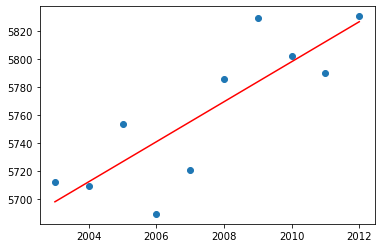

In [90]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [91]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.6873301381266681

In [92]:
all_act_2012_res_emp_slope = model.coef_
all_act_2012_res_emp_slope

array([[14.2681973]])

#### 2003-2019 Regression

In [93]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]).reshape((-1, 1))
activity_hours_per_day = np.array([all_act_2003_res_emp_hpd, all_act_2004_res_emp_hpd, all_act_2005_res_emp_hpd,
                                   all_act_2006_res_emp_hpd, all_act_2007_res_emp_hpd, all_act_2008_res_emp_hpd,
                                   all_act_2009_res_emp_hpd, all_act_2010_res_emp_hpd, all_act_2011_res_emp_hpd,
                                   all_act_2012_res_emp_hpd, all_act_2013_res_emp_hpd, all_act_2014_res_emp_hpd,
                                   all_act_2015_res_emp_hpd, all_act_2016_res_emp_hpd, all_act_2017_res_emp_hpd,
                                   all_act_2018_res_emp_hpd, all_act_2019_res_emp_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

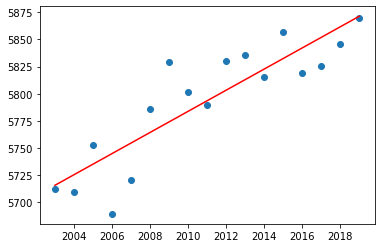

In [94]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [95]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.7621163745690702

In [96]:
all_act_2019_res_emp_slope = model.coef_
all_act_2019_res_emp_slope

array([[9.73114398]])

### 2003-2019 NonResidential - Employed

In [97]:
#non-residential = 2,4,5,6,7,8,9,10,11,30,31,32

In [98]:
nonresidential_location = [2,4,5,6,7,8,9,10,11,30,31,32]
atus_multi_yr_nonres_emp = multi_merged_Employed[multi_merged_Employed["TEWHERE"].isin(nonresidential_location)]
#atus_multi_yr_res_emp

In [99]:
atus_2003_nonres_emp = atus_multi_yr_nonres_emp[atus_multi_yr_nonres_emp["TUCASEID"].apply(str).str.startswith("2003")]
atus_2004_nonres_emp = atus_multi_yr_nonres_emp[atus_multi_yr_nonres_emp["TUCASEID"].apply(str).str.startswith("2004")]
atus_2005_nonres_emp = atus_multi_yr_nonres_emp[atus_multi_yr_nonres_emp["TUCASEID"].apply(str).str.startswith("2005")]
atus_2006_nonres_emp = atus_multi_yr_nonres_emp[atus_multi_yr_nonres_emp["TUCASEID"].apply(str).str.startswith("2006")]
atus_2007_nonres_emp = atus_multi_yr_nonres_emp[atus_multi_yr_nonres_emp["TUCASEID"].apply(str).str.startswith("2007")]
atus_2008_nonres_emp = atus_multi_yr_nonres_emp[atus_multi_yr_nonres_emp["TUCASEID"].apply(str).str.startswith("2008")]
atus_2009_nonres_emp = atus_multi_yr_nonres_emp[atus_multi_yr_nonres_emp["TUCASEID"].apply(str).str.startswith("2009")]
atus_2010_nonres_emp = atus_multi_yr_nonres_emp[atus_multi_yr_nonres_emp["TUCASEID"].apply(str).str.startswith("2010")]
atus_2011_nonres_emp = atus_multi_yr_nonres_emp[atus_multi_yr_nonres_emp["TUCASEID"].apply(str).str.startswith("2011")]
atus_2012_nonres_emp = atus_multi_yr_nonres_emp[atus_multi_yr_nonres_emp["TUCASEID"].apply(str).str.startswith("2012")]
atus_2013_nonres_emp = atus_multi_yr_nonres_emp[atus_multi_yr_nonres_emp["TUCASEID"].apply(str).str.startswith("2013")]
atus_2014_nonres_emp = atus_multi_yr_nonres_emp[atus_multi_yr_nonres_emp["TUCASEID"].apply(str).str.startswith("2014")]
atus_2015_nonres_emp = atus_multi_yr_nonres_emp[atus_multi_yr_nonres_emp["TUCASEID"].apply(str).str.startswith("2015")]
atus_2016_nonres_emp = atus_multi_yr_nonres_emp[atus_multi_yr_nonres_emp["TUCASEID"].apply(str).str.startswith("2016")]
atus_2017_nonres_emp = atus_multi_yr_nonres_emp[atus_multi_yr_nonres_emp["TUCASEID"].apply(str).str.startswith("2017")]
atus_2018_nonres_emp = atus_multi_yr_nonres_emp[atus_multi_yr_nonres_emp["TUCASEID"].apply(str).str.startswith("2018")]
atus_2019_nonres_emp = atus_multi_yr_nonres_emp[atus_multi_yr_nonres_emp["TUCASEID"].apply(str).str.startswith("2019")]
#atus_2003_nonres_emp

### 2003 All Activities - NonResidential - Employed

In [100]:
atus_2003_all_nonres_emp = atus_2003_nonres_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2003_all_nonres_emp

In [101]:
atus_2003_all_nonres_emp_merge = pd.merge(atus_2003_all_nonres_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2003_all_res_emp_merge

In [102]:
atus_2003_all_nonres_emp_merge["Multiplied Weight"]=atus_2003_all_nonres_emp_merge["TUACTDUR24"]*atus_2003_all_nonres_emp_merge["TUFNWGTP"]
#atus_2003_all_nonres_emp_merge

In [103]:
atus_2003_all_nonres_emp_multiplied_weight = atus_2003_all_nonres_emp_merge["Multiplied Weight"].sum()
atus_2003_all_nonres_emp_multiplied_weight

21998777295558.215

In [104]:
all_act_2003_nonres_emp_hpd = atus_2003_all_nonres_emp_multiplied_weight / atus_2003_emp_weight / 60
all_act_2003_nonres_emp_hpd

6.893507813104821

### 2004 All Activities - NonResidential - Employed

In [105]:
atus_2004_all_nonres_emp = atus_2004_nonres_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2004_all_nonres_emp

In [106]:
atus_2004_all_nonres_emp_merge = pd.merge(atus_2004_all_nonres_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2004_all_res_emp_merge

In [107]:
atus_2004_all_nonres_emp_merge["Multiplied Weight"]=atus_2004_all_nonres_emp_merge["TUACTDUR24"]*atus_2004_all_nonres_emp_merge["TUFNWGTP"]

atus_2004_all_nonres_emp_multiplied_weight = atus_2004_all_nonres_emp_merge["Multiplied Weight"].sum()
atus_2004_all_nonres_emp_multiplied_weight

22293121895452.266

In [108]:
all_act_2004_nonres_emp_hpd = atus_2004_all_nonres_emp_multiplied_weight / atus_2004_emp_weight / 60
all_act_2004_nonres_emp_hpd

6.9615687433215765

### 2005 All Activities - NonResidential - Employed

In [109]:
atus_2005_all_nonres_emp = atus_2005_nonres_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2005_all_nonres_emp

In [110]:
atus_2005_all_nonres_emp_merge = pd.merge(atus_2005_all_nonres_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2005_all_res_emp_merge

In [111]:
atus_2005_all_nonres_emp_merge["Multiplied Weight"]=atus_2005_all_nonres_emp_merge["TUACTDUR24"]*atus_2005_all_nonres_emp_merge["TUFNWGTP"]

atus_2005_all_nonres_emp_multiplied_weight = atus_2005_all_nonres_emp_merge["Multiplied Weight"].sum()
atus_2005_all_nonres_emp_multiplied_weight

22655890976137.28

In [112]:
all_act_2005_nonres_emp_hpd = atus_2005_all_nonres_emp_multiplied_weight / atus_2005_emp_weight / 60
all_act_2005_nonres_emp_hpd

6.861906078190066

### 2006 All Activities - NonResidential - Employed

In [113]:
atus_2006_all_nonres_emp = atus_2006_nonres_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2006_all_nonres_emp

In [114]:
atus_2006_all_nonres_emp_merge = pd.merge(atus_2006_all_nonres_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2006_all_res_emp_merge

In [115]:
atus_2006_all_nonres_emp_merge["Multiplied Weight"]=atus_2006_all_nonres_emp_merge["TUACTDUR24"]*atus_2006_all_nonres_emp_merge["TUFNWGTP"]

atus_2006_all_nonres_emp_multiplied_weight = atus_2006_all_nonres_emp_merge["Multiplied Weight"].sum()
atus_2006_all_nonres_emp_multiplied_weight

23251929261560.9

In [116]:
all_act_2006_nonres_emp_hpd = atus_2006_all_nonres_emp_multiplied_weight / atus_2006_emp_weight / 60
all_act_2006_nonres_emp_hpd

7.023204835821429

### 2007 All Activities - NonResidential - Employed

In [117]:
atus_2007_all_nonres_emp = atus_2007_nonres_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2007_all_nonres_emp

In [118]:
atus_2007_all_nonres_emp_merge = pd.merge(atus_2007_all_nonres_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2007_all_res_emp_merge

In [119]:
atus_2007_all_nonres_emp_merge["Multiplied Weight"]=atus_2007_all_nonres_emp_merge["TUACTDUR24"]*atus_2007_all_nonres_emp_merge["TUFNWGTP"]

atus_2007_all_nonres_emp_multiplied_weight = atus_2007_all_nonres_emp_merge["Multiplied Weight"].sum()
atus_2007_all_nonres_emp_multiplied_weight

23745013571643.18

In [120]:
all_act_2007_nonres_emp_hpd = atus_2007_all_nonres_emp_multiplied_weight / atus_2007_emp_weight / 60
all_act_2007_nonres_emp_hpd

6.972560417710713

### 2008 All Activities - NonResidential - Employed

In [121]:
atus_2008_all_nonres_emp = atus_2008_nonres_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2008_all_nonres_emp

In [122]:
atus_2008_all_nonres_emp_merge = pd.merge(atus_2008_all_nonres_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2008_all_res_emp_merge

In [123]:
atus_2008_all_nonres_emp_merge["Multiplied Weight"]=atus_2008_all_nonres_emp_merge["TUACTDUR24"]*atus_2008_all_nonres_emp_merge["TUFNWGTP"]

atus_2008_all_nonres_emp_multiplied_weight = atus_2008_all_nonres_emp_merge["Multiplied Weight"].sum()
atus_2008_all_nonres_emp_multiplied_weight

23134767043052.89

In [124]:
all_act_2008_nonres_emp_hpd = atus_2008_all_nonres_emp_multiplied_weight / atus_2008_emp_weight / 60
all_act_2008_nonres_emp_hpd

6.780511580535866

### 2009 All Activities - NonResidential - Employed

In [125]:
atus_2009_all_nonres_emp = atus_2009_nonres_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2009_all_nonres_emp

In [126]:
atus_2009_all_nonres_emp_merge = pd.merge(atus_2009_all_nonres_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2009_all_res_emp_merge

In [127]:
atus_2009_all_nonres_emp_merge["Multiplied Weight"]=atus_2009_all_nonres_emp_merge["TUACTDUR24"]*atus_2009_all_nonres_emp_merge["TUFNWGTP"]

atus_2009_all_nonres_emp_multiplied_weight = atus_2009_all_nonres_emp_merge["Multiplied Weight"].sum()
atus_2009_all_nonres_emp_multiplied_weight

21703236486228.14

In [128]:
all_act_2009_nonres_emp_hpd = atus_2009_all_nonres_emp_multiplied_weight / atus_2009_emp_weight / 60
all_act_2009_nonres_emp_hpd

6.663612289786675

### 2010 All Activities - NonResidential - Employed

In [129]:
atus_2010_all_nonres_emp = atus_2010_nonres_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2010_all_nonres_emp

In [130]:
atus_2010_all_nonres_emp_merge = pd.merge(atus_2010_all_nonres_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2010_all_res_emp_merge

In [131]:
atus_2010_all_nonres_emp_merge["Multiplied Weight"]=atus_2010_all_nonres_emp_merge["TUACTDUR24"]*atus_2010_all_nonres_emp_merge["TUFNWGTP"]

atus_2010_all_nonres_emp_multiplied_weight = atus_2010_all_nonres_emp_merge["Multiplied Weight"].sum()
atus_2010_all_nonres_emp_multiplied_weight

21628481109784.402

In [132]:
all_act_2010_nonres_emp_hpd = atus_2010_all_nonres_emp_multiplied_weight / atus_2010_emp_weight / 60
all_act_2010_nonres_emp_hpd

6.684437880814465

### 2011 All Activities - NonResidential - Employed

In [133]:
atus_2011_all_nonres_emp = atus_2011_nonres_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2011_all_nonres_emp

In [134]:
atus_2011_all_nonres_emp_merge = pd.merge(atus_2011_all_nonres_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2011_all_res_emp_merge

In [135]:
atus_2011_all_nonres_emp_merge["Multiplied Weight"]=atus_2011_all_nonres_emp_merge["TUACTDUR24"]*atus_2011_all_nonres_emp_merge["TUFNWGTP"]

atus_2011_all_nonres_emp_multiplied_weight = atus_2011_all_nonres_emp_merge["Multiplied Weight"].sum()
atus_2011_all_nonres_emp_multiplied_weight

22093993794446.1

In [136]:
all_act_2011_nonres_emp_hpd = atus_2011_all_nonres_emp_multiplied_weight / atus_2011_emp_weight / 60
all_act_2011_nonres_emp_hpd

6.753382932723152

### 2012 All Activities - NonResidential - Employed

In [137]:
atus_2012_all_nonres_emp = atus_2012_nonres_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2012_all_nonres_emp

In [138]:
atus_2012_all_nonres_emp_merge = pd.merge(atus_2012_all_nonres_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2012_all_res_emp_merge

In [139]:
atus_2012_all_nonres_emp_merge["Multiplied Weight"]=atus_2012_all_nonres_emp_merge["TUACTDUR24"]*atus_2012_all_nonres_emp_merge["TUFNWGTP"]

atus_2012_all_nonres_emp_multiplied_weight = atus_2012_all_nonres_emp_merge["Multiplied Weight"].sum()
atus_2012_all_nonres_emp_multiplied_weight

22006128105925.477

In [140]:
all_act_2012_nonres_emp_hpd = atus_2012_all_nonres_emp_multiplied_weight / atus_2012_emp_weight / 60
all_act_2012_nonres_emp_hpd

6.641835072504382

### 2013 All Activities - NonResidential - Employed

In [141]:
atus_2013_all_nonres_emp = atus_2013_nonres_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2013_all_nonres_emp

In [142]:
atus_2013_all_nonres_emp_merge = pd.merge(atus_2013_all_nonres_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2013_all_res_emp_merge

In [143]:
atus_2013_all_nonres_emp_merge["Multiplied Weight"]=atus_2013_all_nonres_emp_merge["TUACTDUR24"]*atus_2013_all_nonres_emp_merge["TUFNWGTP"]

atus_2013_all_nonres_emp_multiplied_weight = atus_2013_all_nonres_emp_merge["Multiplied Weight"].sum()
atus_2013_all_nonres_emp_multiplied_weight

22017723279214.938

In [144]:
all_act_2013_nonres_emp_hpd = atus_2013_all_nonres_emp_multiplied_weight / atus_2013_emp_weight / 60
all_act_2013_nonres_emp_hpd

6.628901739213757

### 2014 All Activities - NonResidential - Employed

In [145]:
atus_2014_all_nonres_emp = atus_2014_nonres_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2014_all_nonres_emp

In [146]:
atus_2014_all_nonres_emp_merge = pd.merge(atus_2014_all_nonres_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2014_all_res_emp_merge

In [147]:
atus_2014_all_nonres_emp_merge["Multiplied Weight"]=atus_2014_all_nonres_emp_merge["TUACTDUR24"]*atus_2014_all_nonres_emp_merge["TUFNWGTP"]

atus_2014_all_nonres_emp_multiplied_weight = atus_2014_all_nonres_emp_merge["Multiplied Weight"].sum()
atus_2014_all_nonres_emp_multiplied_weight

22755879405550.22

In [148]:
all_act_2014_nonres_emp_hpd = atus_2014_all_nonres_emp_multiplied_weight / atus_2014_emp_weight / 60
all_act_2014_nonres_emp_hpd

6.7612771220815215

### 2015 All Activities - NonResidential - Employed

In [149]:
atus_2015_all_nonres_emp = atus_2015_nonres_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2015_all_nonres_emp

In [150]:
atus_2015_all_nonres_emp_merge = pd.merge(atus_2015_all_nonres_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2015_all_res_emp_merge

In [151]:
atus_2015_all_nonres_emp_merge["Multiplied Weight"]=atus_2015_all_nonres_emp_merge["TUACTDUR24"]*atus_2015_all_nonres_emp_merge["TUFNWGTP"]

atus_2015_all_nonres_emp_multiplied_weight = atus_2015_all_nonres_emp_merge["Multiplied Weight"].sum()
atus_2015_all_nonres_emp_multiplied_weight

22689668235102.58

In [152]:
all_act_2015_nonres_emp_hpd = atus_2015_all_nonres_emp_multiplied_weight / atus_2015_emp_weight / 60
all_act_2015_nonres_emp_hpd

6.604681820952239

### 2016 All Activities - NonResidential - Employed

In [153]:
atus_2016_all_nonres_emp = atus_2016_nonres_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2016_all_nonres_emp

In [154]:
atus_2016_all_nonres_emp_merge = pd.merge(atus_2016_all_nonres_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2016_all_res_emp_merge

In [155]:
atus_2016_all_nonres_emp_merge["Multiplied Weight"]=atus_2016_all_nonres_emp_merge["TUACTDUR24"]*atus_2016_all_nonres_emp_merge["TUFNWGTP"]

atus_2016_all_nonres_emp_multiplied_weight = atus_2016_all_nonres_emp_merge["Multiplied Weight"].sum()
atus_2016_all_nonres_emp_multiplied_weight

23616443382878.727

In [156]:
all_act_2016_nonres_emp_hpd = atus_2016_all_nonres_emp_multiplied_weight / atus_2016_emp_weight / 60
all_act_2016_nonres_emp_hpd

6.648018830445082

### 2017 All Activities - NonResidential - Employed

In [157]:
atus_2017_all_nonres_emp = atus_2017_nonres_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2017_all_nonres_emp

In [158]:
atus_2017_all_nonres_emp_merge = pd.merge(atus_2017_all_nonres_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2017_all_res_emp_merge

In [159]:
atus_2017_all_nonres_emp_merge["Multiplied Weight"]=atus_2017_all_nonres_emp_merge["TUACTDUR24"]*atus_2017_all_nonres_emp_merge["TUFNWGTP"]

atus_2017_all_nonres_emp_multiplied_weight = atus_2017_all_nonres_emp_merge["Multiplied Weight"].sum()
atus_2017_all_nonres_emp_multiplied_weight

23434492208071.816

In [160]:
all_act_2017_nonres_emp_hpd = atus_2017_all_nonres_emp_multiplied_weight / atus_2017_emp_weight / 60
all_act_2017_nonres_emp_hpd

6.619626336044676

### 2018 All Activities - NonResidential - Employed

In [161]:
atus_2018_all_nonres_emp = atus_2018_nonres_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2018_all_nonres_emp

In [162]:
atus_2018_all_nonres_emp_merge = pd.merge(atus_2018_all_nonres_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2018_all_res_emp_merge

In [163]:
atus_2018_all_nonres_emp_merge["Multiplied Weight"]=atus_2018_all_nonres_emp_merge["TUACTDUR24"]*atus_2018_all_nonres_emp_merge["TUFNWGTP"]

atus_2018_all_nonres_emp_multiplied_weight = atus_2018_all_nonres_emp_merge["Multiplied Weight"].sum()
atus_2018_all_nonres_emp_multiplied_weight

23921337236922.016

In [164]:
all_act_2018_nonres_emp_hpd = atus_2018_all_nonres_emp_multiplied_weight / atus_2018_emp_weight / 60
all_act_2018_nonres_emp_hpd

6.609201707949394

### 2019 All Activities - NonResidential - Employed

In [165]:
atus_2019_all_nonres_emp = atus_2019_nonres_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2019_all_nonres_emp

In [166]:
atus_2019_all_nonres_emp_merge = pd.merge(atus_2019_all_nonres_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2019_all_res_emp_merge

In [167]:
atus_2019_all_nonres_emp_merge["Multiplied Weight"]=atus_2019_all_nonres_emp_merge["TUACTDUR24"]*atus_2019_all_nonres_emp_merge["TUFNWGTP"]

atus_2019_all_nonres_emp_multiplied_weight = atus_2019_all_nonres_emp_merge["Multiplied Weight"].sum()
atus_2019_all_nonres_emp_multiplied_weight

23690051479910.832

In [168]:
all_act_2019_nonres_emp_hpd = atus_2019_all_nonres_emp_multiplied_weight / atus_2019_emp_weight / 60
all_act_2019_nonres_emp_hpd

6.504652349214228

### Regresssion: All Activities - NonResidential - Employed

#### 2003 -2012 Regression

In [169]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012]).reshape((-1, 1))
activity_hours_per_day = np.array([all_act_2003_nonres_emp_hpd, all_act_2004_nonres_emp_hpd, all_act_2005_nonres_emp_hpd,
                                   all_act_2006_nonres_emp_hpd, all_act_2007_nonres_emp_hpd, all_act_2008_nonres_emp_hpd,
                                   all_act_2009_nonres_emp_hpd, all_act_2010_nonres_emp_hpd, all_act_2011_nonres_emp_hpd,
                                   all_act_2012_nonres_emp_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

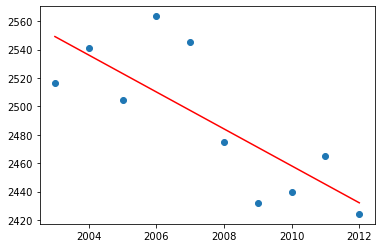

In [170]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [171]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.6085028181921084

In [172]:
all_act_2012_nonres_emp_slope = model.coef_
all_act_2012_nonres_emp_slope

array([[-13.00842923]])

#### 2003 -2019 Regression

In [173]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]).reshape((-1, 1))
activity_hours_per_day = np.array([all_act_2003_nonres_emp_hpd, all_act_2004_nonres_emp_hpd, all_act_2005_nonres_emp_hpd,
                                   all_act_2006_nonres_emp_hpd, all_act_2007_nonres_emp_hpd, all_act_2008_nonres_emp_hpd,
                                   all_act_2009_nonres_emp_hpd, all_act_2010_nonres_emp_hpd, all_act_2011_nonres_emp_hpd,
                                   all_act_2012_nonres_emp_hpd, all_act_2013_nonres_emp_hpd, all_act_2014_nonres_emp_hpd,
                                   all_act_2015_nonres_emp_hpd, all_act_2016_nonres_emp_hpd, all_act_2017_nonres_emp_hpd,
                                   all_act_2018_nonres_emp_hpd, all_act_2019_nonres_emp_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

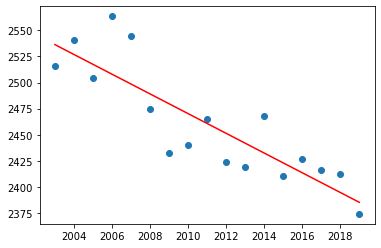

In [174]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [175]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.7397008581608253

In [176]:
all_act_2019_nonres_emp_slope = model.coef_
all_act_2019_nonres_emp_slope

array([[-9.43655891]])

## 2003-2019 Transportation - Employed

### 2003 Transportation

In [177]:
#transporation = 12, 13. 12 = Car, truck, or motorcycle (driver), 13= Car, truck, or motorcycle (passager)

In [178]:
transpoartion_location = [12,13]
atus_multi_yr_tran_emp = multi_merged_Employed[multi_merged_Employed["TEWHERE"].isin(transpoartion_location)]
#atus_multi_yr_tran_emp

In [179]:
#atus transportation Employed population seperated by year
atus_2003_tran_emp = atus_multi_yr_tran_emp[atus_multi_yr_tran_emp["TUCASEID"].apply(str).str.startswith("2003")]
atus_2004_tran_emp = atus_multi_yr_tran_emp[atus_multi_yr_tran_emp["TUCASEID"].apply(str).str.startswith("2004")]
atus_2005_tran_emp = atus_multi_yr_tran_emp[atus_multi_yr_tran_emp["TUCASEID"].apply(str).str.startswith("2005")]
atus_2006_tran_emp = atus_multi_yr_tran_emp[atus_multi_yr_tran_emp["TUCASEID"].apply(str).str.startswith("2006")]
atus_2007_tran_emp = atus_multi_yr_tran_emp[atus_multi_yr_tran_emp["TUCASEID"].apply(str).str.startswith("2007")]
atus_2008_tran_emp = atus_multi_yr_tran_emp[atus_multi_yr_tran_emp["TUCASEID"].apply(str).str.startswith("2008")]
atus_2009_tran_emp = atus_multi_yr_tran_emp[atus_multi_yr_tran_emp["TUCASEID"].apply(str).str.startswith("2009")]
atus_2010_tran_emp = atus_multi_yr_tran_emp[atus_multi_yr_tran_emp["TUCASEID"].apply(str).str.startswith("2010")]
atus_2011_tran_emp = atus_multi_yr_tran_emp[atus_multi_yr_tran_emp["TUCASEID"].apply(str).str.startswith("2011")]
atus_2012_tran_emp = atus_multi_yr_tran_emp[atus_multi_yr_tran_emp["TUCASEID"].apply(str).str.startswith("2012")]
atus_2013_tran_emp = atus_multi_yr_tran_emp[atus_multi_yr_tran_emp["TUCASEID"].apply(str).str.startswith("2013")]
atus_2014_tran_emp = atus_multi_yr_tran_emp[atus_multi_yr_tran_emp["TUCASEID"].apply(str).str.startswith("2014")]
atus_2015_tran_emp = atus_multi_yr_tran_emp[atus_multi_yr_tran_emp["TUCASEID"].apply(str).str.startswith("2015")]
atus_2016_tran_emp = atus_multi_yr_tran_emp[atus_multi_yr_tran_emp["TUCASEID"].apply(str).str.startswith("2016")]
atus_2017_tran_emp = atus_multi_yr_tran_emp[atus_multi_yr_tran_emp["TUCASEID"].apply(str).str.startswith("2017")]
atus_2018_tran_emp = atus_multi_yr_tran_emp[atus_multi_yr_tran_emp["TUCASEID"].apply(str).str.startswith("2018")]
atus_2019_tran_emp = atus_multi_yr_tran_emp[atus_multi_yr_tran_emp["TUCASEID"].apply(str).str.startswith("2019")]
#atus_2003_tran_emp

In [180]:
atus_2003_tran_emp = atus_2003_tran_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2003_tran_emp

In [181]:
atus_2003_tran_emp_merge = pd.merge(atus_2003_tran_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2003_tran_emp_merge

In [182]:
atus_2003_tran_emp_merge["Multiplied Weight"] = atus_2003_tran_emp_merge["TUACTDUR24"] * atus_2003_tran_emp_merge["TUFNWGTP"]
#atus_2003_tran_emp_merge

In [183]:
atus_2003_tran_emp_multiplied_weight = atus_2003_tran_emp_merge["Multiplied Weight"].sum()
atus_2003_tran_emp_multiplied_weight

4167245994357.7397

In [184]:
atus_2003_tran_emp_hpd = atus_2003_tran_emp_multiplied_weight / atus_2003_emp_weight / 60
atus_2003_tran_emp_hpd

1.3058427036776776

### 2004 Transportation

In [185]:
atus_2004_tran_emp = atus_2004_tran_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2004_tran_emp_merge = pd.merge(atus_2004_tran_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2004_tran_emp_merge

In [186]:
atus_2004_tran_emp_merge["Multiplied Weight"] = atus_2004_tran_emp_merge["TUACTDUR24"] * atus_2004_tran_emp_merge["TUFNWGTP"]
atus_2004_tran_emp_multiplied_weight = atus_2004_tran_emp_merge["Multiplied Weight"].sum()
atus_2004_tran_emp_multiplied_weight

4078153407613.2627

In [187]:
atus_2004_tran_emp_hpd = atus_2004_tran_emp_multiplied_weight / atus_2004_emp_weight / 60
atus_2004_tran_emp_hpd

1.273502447349127

### 2005 Transportation

In [188]:
atus_2005_tran_emp = atus_2005_tran_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2005_tran_emp_merge = pd.merge(atus_2005_tran_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2005_tran_emp_merge

In [189]:
atus_2005_tran_emp_merge["Multiplied Weight"] = atus_2005_tran_emp_merge["TUACTDUR24"] * atus_2005_tran_emp_merge["TUFNWGTP"]
atus_2005_tran_emp_multiplied_weight = atus_2005_tran_emp_merge["Multiplied Weight"].sum()
atus_2005_tran_emp_multiplied_weight

4099058361310.119

In [190]:
atus_2005_tran_emp_hpd = atus_2005_tran_emp_multiplied_weight / atus_2005_emp_weight / 60
atus_2005_tran_emp_hpd

1.24150286183648

### 2006 Transportation

In [191]:
atus_2006_tran_emp = atus_2006_tran_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2006_tran_emp_merge = pd.merge(atus_2006_tran_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2006_tran_emp_merge

In [192]:
atus_2006_tran_emp_merge["Multiplied Weight"] = atus_2006_tran_emp_merge["TUACTDUR24"] * atus_2006_tran_emp_merge["TUFNWGTP"]
atus_2006_tran_emp_multiplied_weight = atus_2006_tran_emp_merge["Multiplied Weight"].sum()
atus_2006_tran_emp_multiplied_weight

4087542084627.415

In [193]:
atus_2006_tran_emp_hpd = atus_2006_tran_emp_multiplied_weight / atus_2006_emp_weight / 60
atus_2006_tran_emp_hpd

1.2346349850133564

### 2007 Transportation

In [194]:
atus_2007_tran_emp = atus_2007_tran_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2007_tran_emp_merge = pd.merge(atus_2007_tran_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2007_tran_emp_merge

In [195]:
atus_2007_tran_emp_merge["Multiplied Weight"] = atus_2007_tran_emp_merge["TUACTDUR24"] * atus_2007_tran_emp_merge["TUFNWGTP"]
atus_2007_tran_emp_multiplied_weight = atus_2007_tran_emp_merge["Multiplied Weight"].sum()
atus_2007_tran_emp_multiplied_weight

4161956618730.7344

In [196]:
atus_2007_tran_emp_hpd = atus_2007_tran_emp_multiplied_weight / atus_2007_emp_weight / 60
atus_2007_tran_emp_hpd

1.2221300228965444

### 2008 Transportation

In [197]:
atus_2008_tran_emp = atus_2008_tran_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2008_tran_emp_merge = pd.merge(atus_2008_tran_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2008_tran_emp_merge

In [198]:
atus_2008_tran_emp_merge["Multiplied Weight"] = atus_2008_tran_emp_merge["TUACTDUR24"] * atus_2008_tran_emp_merge["TUFNWGTP"]
atus_2008_tran_emp_multiplied_weight = atus_2008_tran_emp_merge["Multiplied Weight"].sum()
atus_2008_tran_emp_multiplied_weight

4121617924756.8374

In [199]:
atus_2008_tran_emp_hpd = atus_2008_tran_emp_multiplied_weight / atus_2008_emp_weight / 60
atus_2008_tran_emp_hpd

1.207994790582947

### 2009 Transportation

In [200]:
atus_2009_tran_emp = atus_2009_tran_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2009_tran_emp_merge = pd.merge(atus_2009_tran_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2009_tran_emp_merge

In [201]:
atus_2009_tran_emp_merge["Multiplied Weight"] = atus_2009_tran_emp_merge["TUACTDUR24"] * atus_2009_tran_emp_merge["TUFNWGTP"]
atus_2009_tran_emp_multiplied_weight = atus_2009_tran_emp_merge["Multiplied Weight"].sum()
atus_2009_tran_emp_multiplied_weight

3966645758459.585

In [202]:
atus_2009_tran_emp_hpd = atus_2009_tran_emp_multiplied_weight / atus_2009_emp_weight / 60
atus_2009_tran_emp_hpd

1.2178916007331033

### 2010 Transportation

In [203]:
atus_2010_tran_emp = atus_2010_tran_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2010_tran_emp_merge = pd.merge(atus_2010_tran_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2010_tran_emp_merge

In [204]:
atus_2010_tran_emp_merge["Multiplied Weight"] = atus_2010_tran_emp_merge["TUACTDUR24"] * atus_2010_tran_emp_merge["TUFNWGTP"]
atus_2010_tran_emp_multiplied_weight = atus_2010_tran_emp_merge["Multiplied Weight"].sum()
atus_2010_tran_emp_multiplied_weight

4104128562661.0596

In [205]:
atus_2010_tran_emp_hpd = atus_2010_tran_emp_multiplied_weight / atus_2010_emp_weight / 60
atus_2010_tran_emp_hpd

1.2684104950658588

### 2011 Transportation

In [206]:
atus_2011_tran_emp = atus_2011_tran_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2011_tran_emp_merge = pd.merge(atus_2011_tran_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2011_tran_emp_merge

In [207]:
atus_2011_tran_emp_merge["Multiplied Weight"] = atus_2011_tran_emp_merge["TUACTDUR24"] * atus_2011_tran_emp_merge["TUFNWGTP"]
atus_2011_tran_emp_multiplied_weight = atus_2011_tran_emp_merge["Multiplied Weight"].sum()
atus_2011_tran_emp_multiplied_weight

4023222019932.2524

In [208]:
atus_2011_tran_emp_hpd = atus_2011_tran_emp_multiplied_weight / atus_2011_emp_weight / 60
atus_2011_tran_emp_hpd

1.2297622230163028

### 2012 Transportation

In [209]:
atus_2012_tran_emp = atus_2012_tran_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2012_tran_emp_merge = pd.merge(atus_2012_tran_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2012_tran_emp_merge

In [210]:
atus_2012_tran_emp_merge["Multiplied Weight"] = atus_2012_tran_emp_merge["TUACTDUR24"] * atus_2012_tran_emp_merge["TUFNWGTP"]
atus_2012_tran_emp_multiplied_weight = atus_2012_tran_emp_merge["Multiplied Weight"].sum()
atus_2012_tran_emp_multiplied_weight

4092251747960.9863

In [211]:
atus_2012_tran_emp_hpd = atus_2012_tran_emp_multiplied_weight / atus_2012_emp_weight / 60
atus_2012_tran_emp_hpd

1.2351132854582452

### 2013 Transportation

In [212]:
atus_2013_tran_emp = atus_2013_tran_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2013_tran_emp_merge = pd.merge(atus_2013_tran_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2013_tran_emp_merge

In [213]:
atus_2013_tran_emp_merge["Multiplied Weight"] = atus_2013_tran_emp_merge["TUACTDUR24"] * atus_2013_tran_emp_merge["TUFNWGTP"]
atus_2013_tran_emp_multiplied_weight = atus_2013_tran_emp_merge["Multiplied Weight"].sum()
atus_2013_tran_emp_multiplied_weight

4077829445772.0977

In [214]:
atus_2013_tran_emp_hpd = atus_2013_tran_emp_multiplied_weight / atus_2013_emp_weight / 60
atus_2013_tran_emp_hpd

1.2277168880042153

### 2014 Transportation

In [215]:
atus_2014_tran_emp = atus_2014_tran_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2014_tran_emp_merge = pd.merge(atus_2014_tran_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2014_tran_emp_merge

In [216]:
atus_2014_tran_emp_merge["Multiplied Weight"] = atus_2014_tran_emp_merge["TUACTDUR24"] * atus_2014_tran_emp_merge["TUFNWGTP"]
atus_2014_tran_emp_multiplied_weight = atus_2014_tran_emp_merge["Multiplied Weight"].sum()
atus_2014_tran_emp_multiplied_weight

3933154940774.0586

In [217]:
atus_2014_tran_emp_hpd = atus_2014_tran_emp_multiplied_weight / atus_2014_emp_weight / 60
atus_2014_tran_emp_hpd

1.1686276783560123

### 2015 Transportation

In [218]:
atus_2015_tran_emp = atus_2015_tran_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2015_tran_emp_merge = pd.merge(atus_2015_tran_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2015_tran_emp_merge

In [219]:
atus_2015_tran_emp_merge["Multiplied Weight"] = atus_2015_tran_emp_merge["TUACTDUR24"] * atus_2015_tran_emp_merge["TUFNWGTP"]
atus_2015_tran_emp_multiplied_weight = atus_2015_tran_emp_merge["Multiplied Weight"].sum()
atus_2015_tran_emp_multiplied_weight

4155892803994.1514

In [220]:
atus_2015_tran_emp_hpd = atus_2015_tran_emp_multiplied_weight / atus_2015_emp_weight / 60
atus_2015_tran_emp_hpd

1.2097289994704192

### 2016 Transportation

In [221]:
atus_2016_tran_emp = atus_2016_tran_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2016_tran_emp_merge = pd.merge(atus_2016_tran_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2016_tran_emp_merge

In [222]:
atus_2016_tran_emp_merge["Multiplied Weight"] = atus_2016_tran_emp_merge["TUACTDUR24"] * atus_2016_tran_emp_merge["TUFNWGTP"]
atus_2016_tran_emp_multiplied_weight = atus_2016_tran_emp_merge["Multiplied Weight"].sum()
atus_2016_tran_emp_multiplied_weight

4437823828695.921

In [223]:
atus_2016_tran_emp_hpd = atus_2016_tran_emp_multiplied_weight / atus_2016_emp_weight / 60
atus_2016_tran_emp_hpd

1.24924553206674

### 2017 Transportation

In [224]:
atus_2017_tran_emp = atus_2017_tran_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2017_tran_emp_merge = pd.merge(atus_2017_tran_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2017_tran_emp_merge

In [225]:
atus_2017_tran_emp_merge["Multiplied Weight"] = atus_2017_tran_emp_merge["TUACTDUR24"] * atus_2017_tran_emp_merge["TUFNWGTP"]
atus_2017_tran_emp_multiplied_weight = atus_2017_tran_emp_merge["Multiplied Weight"].sum()
atus_2017_tran_emp_multiplied_weight

4444140572101.519

In [226]:
atus_2017_tran_emp_hpd = atus_2017_tran_emp_multiplied_weight / atus_2017_emp_weight / 60
atus_2017_tran_emp_hpd

1.255352567956855

### 2018 Transportation

In [227]:
atus_2018_tran_emp = atus_2018_tran_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2018_tran_emp_merge = pd.merge(atus_2018_tran_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2018_tran_emp_merge

In [228]:
atus_2018_tran_emp_merge["Multiplied Weight"] = atus_2018_tran_emp_merge["TUACTDUR24"] * atus_2018_tran_emp_merge["TUFNWGTP"]
atus_2018_tran_emp_multiplied_weight = atus_2018_tran_emp_merge["Multiplied Weight"].sum()
atus_2018_tran_emp_multiplied_weight

4460007201102.445

In [229]:
atus_2018_tran_emp_hpd = atus_2018_tran_emp_multiplied_weight / atus_2018_emp_weight / 60
atus_2018_tran_emp_hpd

1.2322508110247155

### 2019 Transportation

In [230]:
atus_2019_tran_emp = atus_2019_tran_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2019_tran_emp_merge = pd.merge(atus_2019_tran_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2019_tran_emp_merge

In [231]:
atus_2019_tran_emp_merge["Multiplied Weight"] = atus_2019_tran_emp_merge["TUACTDUR24"] * atus_2019_tran_emp_merge["TUFNWGTP"]
atus_2019_tran_emp_multiplied_weight = atus_2019_tran_emp_merge["Multiplied Weight"].sum()
atus_2019_tran_emp_multiplied_weight

4606182762395.939

In [232]:
atus_2019_tran_emp_hpd = atus_2019_tran_emp_multiplied_weight / atus_2019_emp_weight / 60
atus_2019_tran_emp_hpd

1.2647341670716201

### Regresssion: Transportation - Employed

#### 2003 -2012 Regression

In [233]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012]).reshape((-1, 1))
activity_hours_per_day = np.array([atus_2003_tran_emp_hpd, atus_2004_tran_emp_hpd, atus_2005_tran_emp_hpd,
                                   atus_2006_tran_emp_hpd, atus_2007_tran_emp_hpd, atus_2008_tran_emp_hpd,
                                   atus_2009_tran_emp_hpd, atus_2010_tran_emp_hpd, atus_2011_tran_emp_hpd,
                                   atus_2012_tran_emp_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

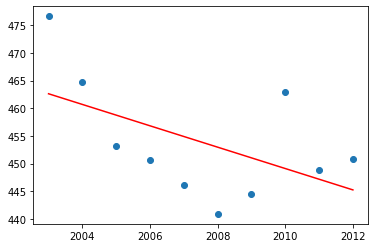

In [234]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [235]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.2840816667147814

In [236]:
tran_2012_emp_slope = model.coef_
tran_2012_emp_slope

array([[-1.93023847]])

#### 2003 -2019 Regression

In [237]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]).reshape((-1, 1))
activity_hours_per_day = np.array([atus_2003_tran_emp_hpd, atus_2004_tran_emp_hpd, atus_2005_tran_emp_hpd,
                                   atus_2006_tran_emp_hpd, atus_2007_tran_emp_hpd, atus_2008_tran_emp_hpd,
                                   atus_2009_tran_emp_hpd, atus_2010_tran_emp_hpd, atus_2011_tran_emp_hpd,
                                   atus_2012_tran_emp_hpd, atus_2013_tran_emp_hpd, atus_2014_tran_emp_hpd,
                                   atus_2015_tran_emp_hpd, atus_2016_tran_emp_hpd, atus_2017_tran_emp_hpd,
                                   atus_2018_tran_emp_hpd, atus_2019_tran_emp_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

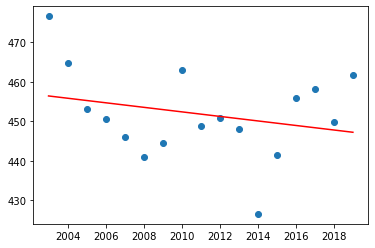

In [238]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [239]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.06603839955597113

In [240]:
tran_2019_emp_slope = model.coef_
tran_2019_emp_slope

array([[-0.57508151]])

### 2003-2019 - Unspecified- Employed

In [241]:
#unspecified = 89, 89 = Unspecified place

In [242]:
unspecified_location = [89]
atus_multi_yr_unsp_emp = multi_merged_Employed[multi_merged_Employed["TEWHERE"].isin(unspecified_location)]
atus_multi_yr_unsp_emp

,TUCASEID,TUACTDUR24,TUCUMDUR,TRTIER1P,TRTIER2P,TRCODEP,TEWHERE,TELFS,TUFNWGTP,TUSTARTTIM,TUSTOPTIME,TUYEAR
373,20030100015941,15,905,04,0405,040507,89,1,1.423997e+06,18:50:00,19:05:00,2003
1237,20030101031030,129,510,13,1301,130131,89,1,2.080731e+06,10:21:00,12:30:00,2003
1315,20030101031047,4,232,03,0301,030112,89,1,3.792077e+06,07:48:00,07:52:00,2003
1324,20030101031047,5,672,03,0301,030111,89,1,3.792077e+06,15:07:00,15:12:00,2003
1325,20030101031047,1,673,03,0301,030112,89,1,3.792077e+06,15:12:00,15:13:00,2003
...,...,...,...,...,...,...,...,...,...,...,...,...
4118327,20191211192468,5,985,04,0405,040507,89,1,3.042547e+06,20:20:00,20:25:00,2019
4119063,20191212190533,45,1035,13,1301,130131,89,1,5.368955e+06,20:30:00,21:15:00,2019
4120912,20191212191980,12,422,03,0305,030504,89,2,1.975811e+07,10:50:00,11:02:00,2019
4120914,20191212191980,10,437,03,0305,030504,89,2,1.975811e+07,11:07:00,11:17:00,2019


In [243]:
#atus transportation Employed population seperated by year
#unsp = unspecified
atus_2003_unsp_emp = atus_multi_yr_unsp_emp[atus_multi_yr_unsp_emp["TUCASEID"].apply(str).str.startswith("2003")]
atus_2004_unsp_emp = atus_multi_yr_unsp_emp[atus_multi_yr_unsp_emp["TUCASEID"].apply(str).str.startswith("2004")]
atus_2005_unsp_emp = atus_multi_yr_unsp_emp[atus_multi_yr_unsp_emp["TUCASEID"].apply(str).str.startswith("2005")]
atus_2006_unsp_emp = atus_multi_yr_unsp_emp[atus_multi_yr_unsp_emp["TUCASEID"].apply(str).str.startswith("2006")]
atus_2007_unsp_emp = atus_multi_yr_unsp_emp[atus_multi_yr_unsp_emp["TUCASEID"].apply(str).str.startswith("2007")]
atus_2008_unsp_emp = atus_multi_yr_unsp_emp[atus_multi_yr_unsp_emp["TUCASEID"].apply(str).str.startswith("2008")]
atus_2009_unsp_emp = atus_multi_yr_unsp_emp[atus_multi_yr_unsp_emp["TUCASEID"].apply(str).str.startswith("2009")]
atus_2010_unsp_emp = atus_multi_yr_unsp_emp[atus_multi_yr_unsp_emp["TUCASEID"].apply(str).str.startswith("2010")]
atus_2011_unsp_emp = atus_multi_yr_unsp_emp[atus_multi_yr_unsp_emp["TUCASEID"].apply(str).str.startswith("2011")]
atus_2012_unsp_emp = atus_multi_yr_unsp_emp[atus_multi_yr_unsp_emp["TUCASEID"].apply(str).str.startswith("2012")]
atus_2013_unsp_emp = atus_multi_yr_unsp_emp[atus_multi_yr_unsp_emp["TUCASEID"].apply(str).str.startswith("2013")]
atus_2014_unsp_emp = atus_multi_yr_unsp_emp[atus_multi_yr_unsp_emp["TUCASEID"].apply(str).str.startswith("2014")]
atus_2015_unsp_emp = atus_multi_yr_unsp_emp[atus_multi_yr_unsp_emp["TUCASEID"].apply(str).str.startswith("2015")]
atus_2016_unsp_emp = atus_multi_yr_unsp_emp[atus_multi_yr_unsp_emp["TUCASEID"].apply(str).str.startswith("2016")]
atus_2017_unsp_emp = atus_multi_yr_unsp_emp[atus_multi_yr_unsp_emp["TUCASEID"].apply(str).str.startswith("2017")]
atus_2018_unsp_emp = atus_multi_yr_unsp_emp[atus_multi_yr_unsp_emp["TUCASEID"].apply(str).str.startswith("2018")]
atus_2019_unsp_emp = atus_multi_yr_unsp_emp[atus_multi_yr_unsp_emp["TUCASEID"].apply(str).str.startswith("2019")]
#atus_2003_unsp_emp
#atus_2004_unsp_emp["TRCODEP"]

### 2003 Unspecified- Employed

In [244]:
atus_2003_unsp_emp = atus_2003_unsp_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24",])
#atus_2003_unsp_emp

In [245]:
atus_2003_unsp_emp_merge = pd.merge(atus_2003_unsp_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2003_unsp_emp_merge

In [246]:
atus_2003_unsp_emp_merge["Multiplied Weight"] = atus_2003_unsp_emp_merge["TUACTDUR24"] * atus_2003_unsp_emp_merge["TUFNWGTP"]
#atus_2003_unsp_emp_merge

In [247]:
atus_2003_unsp_emp_multiplied_weight = atus_2003_unsp_emp_merge["Multiplied Weight"].sum()
atus_2003_unsp_emp_multiplied_weight

56744399079.920456

In [248]:
atus_2003_unsp_emp_hpd = atus_2003_unsp_emp_multiplied_weight / atus_2003_emp_weight / 60
atus_2003_unsp_emp_hpd

0.017781349988317333

### 2004 Unspecified- Employed

In [249]:
atus_2004_unsp_emp = atus_2004_unsp_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2004_unsp_emp

In [250]:
atus_2004_unsp_emp_merge = pd.merge(atus_2004_unsp_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2004_unsp_emp_merge["Multiplied Weight"] = atus_2004_unsp_emp_merge["TUACTDUR24"] * atus_2004_unsp_emp_merge["TUFNWGTP"]

atus_2004_unsp_emp_multiplied_weight = atus_2004_unsp_emp_merge["Multiplied Weight"].sum()
atus_2004_unsp_emp_multiplied_weight

22584931847.80911

In [251]:
atus_2004_unsp_emp_hpd = atus_2004_unsp_emp_multiplied_weight / atus_2004_emp_weight / 60
atus_2004_unsp_emp_hpd

0.007052693488112568

### 2005 Unspecified- Employed

In [252]:
atus_2005_unsp_emp = atus_2005_unsp_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2005_unsp_emp

In [253]:
atus_2005_unsp_emp_merge = pd.merge(atus_2005_unsp_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2005_unsp_emp_merge["Multiplied Weight"] = atus_2005_unsp_emp_merge["TUACTDUR24"] * atus_2005_unsp_emp_merge["TUFNWGTP"]

atus_2005_unsp_emp_multiplied_weight = atus_2005_unsp_emp_merge["Multiplied Weight"].sum()
atus_2005_unsp_emp_multiplied_weight

19645265421.826843

In [254]:
atus_2005_unsp_emp_hpd = atus_2005_unsp_emp_multiplied_weight / atus_2005_emp_weight / 60
atus_2005_unsp_emp_hpd

0.0059500624516455975

### 2006 Unspecified- Employed

In [255]:
atus_2006_unsp_emp = atus_2006_unsp_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2006_unsp_emp

In [256]:
atus_2006_unsp_emp_merge = pd.merge(atus_2006_unsp_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2006_unsp_emp_merge["Multiplied Weight"] = atus_2006_unsp_emp_merge["TUACTDUR24"] * atus_2006_unsp_emp_merge["TUFNWGTP"]

atus_2006_unsp_emp_multiplied_weight = atus_2006_unsp_emp_merge["Multiplied Weight"].sum()
atus_2006_unsp_emp_multiplied_weight

35260313806.88478

In [257]:
atus_2006_unsp_emp_hpd = atus_2006_unsp_emp_multiplied_weight / atus_2006_emp_weight / 60
atus_2006_unsp_emp_hpd

0.010650316524508048

### 2007 Unspecified- Employed

In [258]:
atus_2007_unsp_emp = atus_2007_unsp_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2007_unsp_emp

In [259]:
atus_2007_unsp_emp_merge = pd.merge(atus_2007_unsp_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2007_unsp_emp_merge["Multiplied Weight"] = atus_2007_unsp_emp_merge["TUACTDUR24"] * atus_2007_unsp_emp_merge["TUFNWGTP"]

atus_2007_unsp_emp_multiplied_weight = atus_2007_unsp_emp_merge["Multiplied Weight"].sum()
atus_2007_unsp_emp_multiplied_weight

37938230525.32849

In [260]:
atus_2007_unsp_emp_hpd = atus_2007_unsp_emp_multiplied_weight / atus_2007_emp_weight / 60
atus_2007_unsp_emp_hpd

0.011140301254440774

### 2008 Unspecified- Employed

In [261]:
atus_2008_unsp_emp = atus_2008_unsp_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2008_unsp_emp

In [262]:
atus_2008_unsp_emp_merge = pd.merge(atus_2008_unsp_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2008_unsp_emp_merge["Multiplied Weight"] = atus_2008_unsp_emp_merge["TUACTDUR24"] * atus_2008_unsp_emp_merge["TUFNWGTP"]

atus_2008_unsp_emp_multiplied_weight = atus_2008_unsp_emp_merge["Multiplied Weight"].sum()
atus_2008_unsp_emp_multiplied_weight

53528014222.43309

In [263]:
atus_2008_unsp_emp_hpd = atus_2008_unsp_emp_multiplied_weight / atus_2008_emp_weight / 60
atus_2008_unsp_emp_hpd

0.015688393128958915

### 2009 Unspecified- Employed

In [264]:
atus_2009_unsp_emp = atus_2009_unsp_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2009_unsp_emp

In [265]:
atus_2009_unsp_emp_merge = pd.merge(atus_2009_unsp_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2009_unsp_emp_merge["Multiplied Weight"] = atus_2009_unsp_emp_merge["TUACTDUR24"] * atus_2009_unsp_emp_merge["TUFNWGTP"]

atus_2009_unsp_emp_multiplied_weight = atus_2009_unsp_emp_merge["Multiplied Weight"].sum()
atus_2009_unsp_emp_multiplied_weight

33621751426.241703

In [266]:
atus_2009_unsp_emp_hpd = atus_2009_unsp_emp_multiplied_weight / atus_2009_emp_weight / 60
atus_2009_unsp_emp_hpd

0.010322991050216114

### 2010 Unspecified- Employed

In [267]:
atus_2010_unsp_emp = atus_2010_unsp_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2010_unsp_emp

In [268]:
atus_2010_unsp_emp_merge = pd.merge(atus_2010_unsp_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2010_unsp_emp_merge["Multiplied Weight"] = atus_2010_unsp_emp_merge["TUACTDUR24"] * atus_2010_unsp_emp_merge["TUFNWGTP"]

atus_2010_unsp_emp_multiplied_weight = atus_2010_unsp_emp_merge["Multiplied Weight"].sum()
atus_2010_unsp_emp_multiplied_weight

48426358441.48011

In [269]:
atus_2010_unsp_emp_hpd = atus_2010_unsp_emp_multiplied_weight / atus_2010_emp_weight / 60
atus_2010_unsp_emp_hpd

0.014966514900100432

### 2011 Unspecified- Employed

In [270]:
atus_2011_unsp_emp = atus_2011_unsp_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2011_unsp_emp

In [271]:
atus_2011_unsp_emp_merge = pd.merge(atus_2011_unsp_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2011_unsp_emp_merge["Multiplied Weight"] = atus_2011_unsp_emp_merge["TUACTDUR24"] * atus_2011_unsp_emp_merge["TUFNWGTP"]

atus_2011_unsp_emp_multiplied_weight = atus_2011_unsp_emp_merge["Multiplied Weight"].sum()
atus_2011_unsp_emp_multiplied_weight

51447322637.065384

In [272]:
atus_2011_unsp_emp_hpd = atus_2011_unsp_emp_multiplied_weight / atus_2011_emp_weight / 60
atus_2011_unsp_emp_hpd

0.015725697846389265

### 2012 Unspecified- Employed

In [273]:
atus_2012_unsp_emp = atus_2012_unsp_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2012_unsp_emp

In [274]:
atus_2012_unsp_emp_merge = pd.merge(atus_2012_unsp_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2012_unsp_emp_merge["Multiplied Weight"] = atus_2012_unsp_emp_merge["TUACTDUR24"] * atus_2012_unsp_emp_merge["TUFNWGTP"]

atus_2012_unsp_emp_multiplied_weight = atus_2012_unsp_emp_merge["Multiplied Weight"].sum()
atus_2012_unsp_emp_multiplied_weight

41017293634.509384

In [275]:
atus_2012_unsp_emp_hpd = atus_2012_unsp_emp_multiplied_weight / atus_2012_emp_weight / 60
atus_2012_unsp_emp_hpd

0.012379737958879707

### 2013 Unspecified- Employed

In [276]:
atus_2013_unsp_emp = atus_2013_unsp_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2013_unsp_emp

In [277]:
atus_2013_unsp_emp_merge = pd.merge(atus_2013_unsp_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2013_unsp_emp_merge["Multiplied Weight"] = atus_2013_unsp_emp_merge["TUACTDUR24"] * atus_2013_unsp_emp_merge["TUFNWGTP"]

atus_2013_unsp_emp_multiplied_weight = atus_2013_unsp_emp_merge["Multiplied Weight"].sum()
atus_2013_unsp_emp_multiplied_weight

35391146182.53445

In [278]:
atus_2013_unsp_emp_hpd = atus_2013_unsp_emp_multiplied_weight / atus_2013_emp_weight / 60
atus_2013_unsp_emp_hpd

0.010655253838331278

### 2014 Unspecified- Employed

In [279]:
atus_2014_unsp_emp = atus_2014_unsp_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2014_unsp_emp

In [280]:
atus_2014_unsp_emp_merge = pd.merge(atus_2014_unsp_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2014_unsp_emp_merge["Multiplied Weight"] = atus_2014_unsp_emp_merge["TUACTDUR24"] * atus_2014_unsp_emp_merge["TUFNWGTP"]

atus_2014_unsp_emp_multiplied_weight = atus_2014_unsp_emp_merge["Multiplied Weight"].sum()
atus_2014_unsp_emp_multiplied_weight

36755634707.94489

In [281]:
atus_2014_unsp_emp_hpd = atus_2014_unsp_emp_multiplied_weight / atus_2014_emp_weight / 60
atus_2014_unsp_emp_hpd

0.010920915321681652

### 2015 Unspecified- Employed

In [282]:
atus_2015_unsp_emp = atus_2015_unsp_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2015_unsp_emp

In [283]:
atus_2015_unsp_emp_merge = pd.merge(atus_2015_unsp_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2015_unsp_emp_merge["Multiplied Weight"] = atus_2015_unsp_emp_merge["TUACTDUR24"] * atus_2015_unsp_emp_merge["TUFNWGTP"]

atus_2015_unsp_emp_multiplied_weight = atus_2015_unsp_emp_merge["Multiplied Weight"].sum()
atus_2015_unsp_emp_multiplied_weight

39435365006.095764

In [284]:
atus_2015_unsp_emp_hpd = atus_2015_unsp_emp_multiplied_weight / atus_2015_emp_weight / 60
atus_2015_unsp_emp_hpd

0.01147914705757703

### 2016 Unspecified- Employed

In [285]:
atus_2016_unsp_emp = atus_2016_unsp_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2016_unsp_emp

In [286]:
atus_2016_unsp_emp_merge = pd.merge(atus_2016_unsp_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2016_unsp_emp_merge["Multiplied Weight"] = atus_2016_unsp_emp_merge["TUACTDUR24"] * atus_2016_unsp_emp_merge["TUFNWGTP"]

atus_2016_unsp_emp_multiplied_weight = atus_2016_unsp_emp_merge["Multiplied Weight"].sum()
atus_2016_unsp_emp_multiplied_weight

63960741157.89477

In [287]:
atus_2016_unsp_emp_hpd = atus_2016_unsp_emp_multiplied_weight / atus_2016_emp_weight / 60
atus_2016_unsp_emp_hpd

0.018004921602004446

### 2017 Unspecified- Employed

In [288]:
atus_2017_unsp_emp = atus_2017_unsp_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2017_unsp_emp

In [289]:
atus_2017_unsp_emp_merge = pd.merge(atus_2017_unsp_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2017_unsp_emp_merge["Multiplied Weight"] = atus_2017_unsp_emp_merge["TUACTDUR24"] * atus_2017_unsp_emp_merge["TUFNWGTP"]

atus_2017_unsp_emp_multiplied_weight = atus_2017_unsp_emp_merge["Multiplied Weight"].sum()
atus_2017_unsp_emp_multiplied_weight

52181854921.51392

In [290]:
atus_2017_unsp_emp_hpd = atus_2017_unsp_emp_multiplied_weight / atus_2017_emp_weight / 60
atus_2017_unsp_emp_hpd

0.014739998547232762

### 2018 Unspecified- Employed

In [291]:
atus_2018_unsp_emp = atus_2018_unsp_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2018_unsp_emp

In [292]:
atus_2018_unsp_emp_merge = pd.merge(atus_2018_unsp_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2018_unsp_emp_merge["Multiplied Weight"] = atus_2018_unsp_emp_merge["TUACTDUR24"] * atus_2018_unsp_emp_merge["TUFNWGTP"]

atus_2018_unsp_emp_multiplied_weight = atus_2018_unsp_emp_merge["Multiplied Weight"].sum()
atus_2018_unsp_emp_multiplied_weight

45182842307.05733

In [293]:
atus_2018_unsp_emp_hpd = atus_2018_unsp_emp_multiplied_weight / atus_2018_emp_weight / 60
atus_2018_unsp_emp_hpd

0.012483521117075957

### 2019 Unspecified- Employed

In [294]:
atus_2019_unsp_emp = atus_2019_unsp_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2019_unsp_emp

In [295]:
atus_2019_unsp_emp_merge = pd.merge(atus_2019_unsp_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2019_unsp_emp_merge["Multiplied Weight"] = atus_2019_unsp_emp_merge["TUACTDUR24"] * atus_2019_unsp_emp_merge["TUFNWGTP"]

atus_2019_unsp_emp_multiplied_weight = atus_2019_unsp_emp_merge["Multiplied Weight"].sum()
atus_2019_unsp_emp_multiplied_weight

36815167705.53993

In [296]:
atus_2019_unsp_emp_hpd = atus_2019_unsp_emp_multiplied_weight / atus_2019_emp_weight / 60
atus_2019_unsp_emp_hpd

0.010108457016466453

### Regresssion: Unespecified - Employed

#### 2003 -2012 Regression

In [297]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012]).reshape((-1, 1))
activity_hours_per_day = np.array([atus_2003_unsp_emp_hpd, atus_2004_unsp_emp_hpd, atus_2005_unsp_emp_hpd,
                                   atus_2006_unsp_emp_hpd, atus_2007_unsp_emp_hpd, atus_2008_unsp_emp_hpd,
                                   atus_2009_unsp_emp_hpd, atus_2010_unsp_emp_hpd, atus_2011_unsp_emp_hpd,
                                   atus_2012_unsp_emp_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

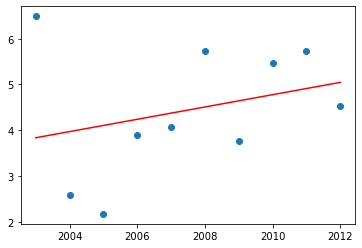

In [298]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [299]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.08220030272171386

In [300]:
all_act_2012_res_emp_slope = model.coef_
all_act_2012_res_emp_slope

array([[0.13437508]])

#### 2003-2019 Regression

In [301]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]).reshape((-1, 1))
activity_hours_per_day = np.array([atus_2003_unsp_emp_hpd, atus_2004_unsp_emp_hpd, atus_2005_unsp_emp_hpd,
                                   atus_2006_unsp_emp_hpd, atus_2007_unsp_emp_hpd, atus_2008_unsp_emp_hpd,
                                   atus_2009_unsp_emp_hpd, atus_2010_unsp_emp_hpd, atus_2011_unsp_emp_hpd,
                                   atus_2012_unsp_emp_hpd, atus_2013_unsp_emp_hpd, atus_2014_unsp_emp_hpd,
                                   atus_2015_unsp_emp_hpd, atus_2016_unsp_emp_hpd, atus_2017_unsp_emp_hpd,
                                   atus_2018_unsp_emp_hpd, atus_2019_unsp_emp_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

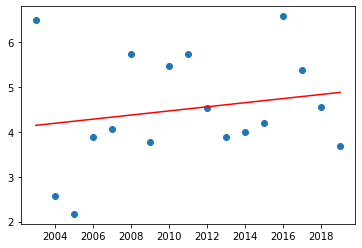

In [302]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [303]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.03487615906611907

In [304]:
all_act_2019_res_emp_slope = model.coef_
all_act_2019_res_emp_slope

array([[0.0458719]])